In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [8]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [9]:
# separando as amostras de teste e treino
# como argumento a coluna que quer segregar e a que quer usar como classe
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,              
                                                            resenha.sentiment, 
                                                                random_state=42) 


In [10]:
print(len(treino), len(teste), len(classe_teste), len(classe_treino))

37094 12365 12365 37094


In [11]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [12]:
print("Positiva \n")
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [13]:
# distribuicao de sentimentos
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [14]:
# padronizar valores neg e pos
classification = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])
classification
# add coluna com a classificacao
resenha['classification'] = classification

In [15]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classification  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg               0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg               0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg               0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg               0  
4  Filmes de fotos de latão não é uma palavra apr...       neg               0

In [16]:
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              49459 non-null  int64 
 1   text_en         49459 non-null  object
 2   text_pt         49459 non-null  object
 3   sentiment       49459 non-null  object
 4   classification  49459 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [17]:
# bag of words - tokenizacao
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim', 'Assisti um filme bom']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

bag_of_words
# pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())


<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [18]:
vetorizar.get_feature_names_out()

array(['Assisti', 'bom', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [19]:
# criar matriz de similaridade

matriz = pd.DataFrame(bag_of_words.toarray(), columns=vetorizar.get_feature_names_out())
matriz

Assisti  bom  filme  ruim  um  ótimo
0        1    0      1     0   1      1
1        1    0      1     1   1      0
2        1    1      1     0   1      0

# Passo a passo dados

Se deve selecionar todos os comentários e vetorizá-los. Depois é necessário dividir os dados em treino e teste para então determinar um método de classificação que trabalhe bem com dados esparsos. Por fim, deve-se treinar o classificador escolhido, realizar a previsão e medir os dados de teste.

In [20]:
# aplicando aos dados
# cria um vetor muito grande então utilizamos a funcao max para pegar as palavras mais frequentes
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer


def classificar_texto(texto_df, column_texto, column_classification):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto_df[column_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,              
                                                            texto_df[column_classification], 
                                                            random_state=42)

    regressao_logistica = LogisticRegression() # solver = 'lbfgs'
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

    
print(classificar_texto(resenha, 'text_pt', "classification"))

0.6583097452486858


# Visualizando os dados em uma wordcloud

In [21]:
# ! pip install wordcloud

# as palavras mais frequentes aparecem maiores permitindo uma analise mais detalhada do nosso corpus visual

import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [22]:
# juntar todas as frases com um list comprehension
all_words = " ".join([texto for texto in resenha.text_pt])
len(all_words)

63448424

In [23]:
nuvem_palavras = WordCloud(width=800,height=500,
                        max_font_size=110,
                        collocations= False   ).generate(all_words) # calculo da freuqencia palavras que mais aparecem e não o bigrama (collocation)

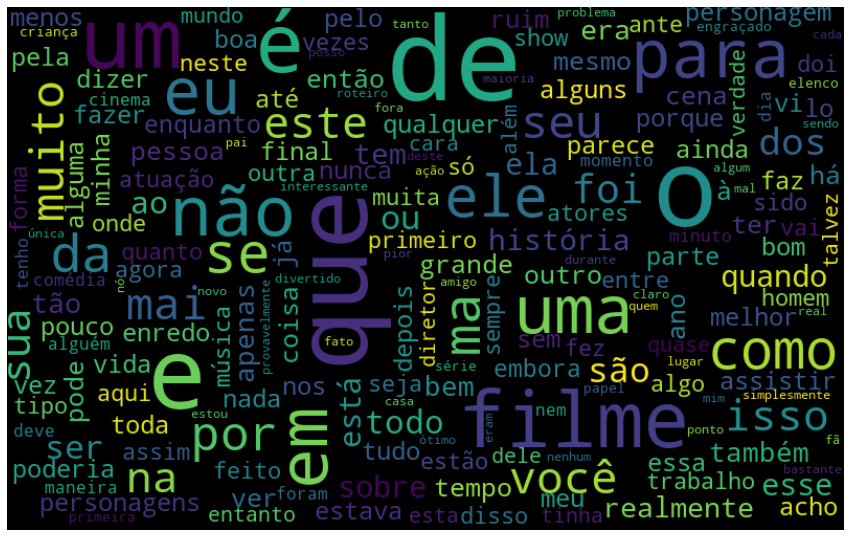

In [24]:
#  criar imagem

plt.figure(figsize=(15,10))
plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolation: mais nitidez
plt.axis("off") # desativar eixos
plt.show()

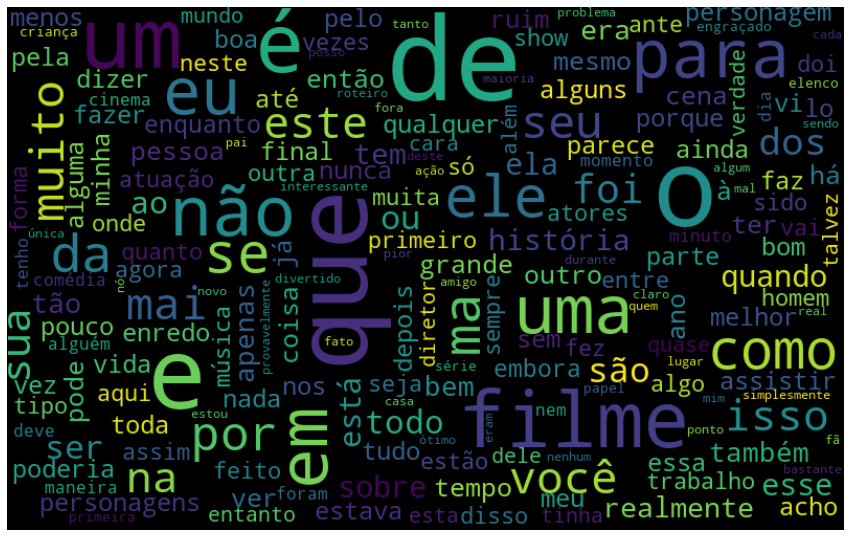

In [25]:
#  criar imagem

plt.figure(figsize=(15,10))
plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolation: mais nitidez
plt.axis("off") # desativar eixos
plt.show()

In [26]:
# funcao imagem positiva

def nuvem_palavras_pos(texto, column_texto):
    texto_pos = texto.query("classification == 1")
    all_words = " ".join([texto for texto in texto_pos[column_texto]])
    nuvem_palavras = WordCloud(width=800,height=500,
                        max_font_size=110,
                        collocations= False   ).generate(all_words)# calculo da freuqencia palavras que mais aparecem e não o bigrama (collocation)
    
    #  criar imagem
    
    plt.figure(figsize=(15,10))
    plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolation: mais nitidez
    plt.axis("off") # desativar eixos
    plt.show()

In [27]:
def nuvem_palavras_neg(texto, column_texto):
    texto_neg = texto.query("classification == 0")
    all_words = " ".join([texto for texto in texto_neg[column_texto]])
    nuvem_palavras = WordCloud(width=800,height=500,
                        max_font_size=110,
                        collocations= False   ).generate(all_words) # calculo da freuqencia palavras que mais aparecem e não o bigrama (collocation)
    
    #  criar imagem
    
    plt.figure(figsize=(15,10))
    plt.imshow(nuvem_palavras, interpolation="bilinear") # interpolation: mais nitidez
    plt.axis("off") # desativar eixos
    plt.show()

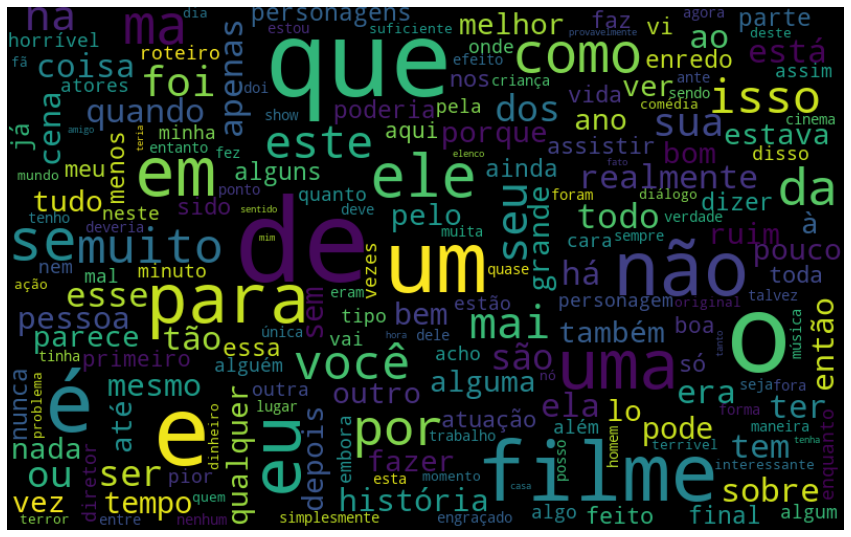

In [28]:
nuvem_palavras_neg(resenha, 'text_pt')

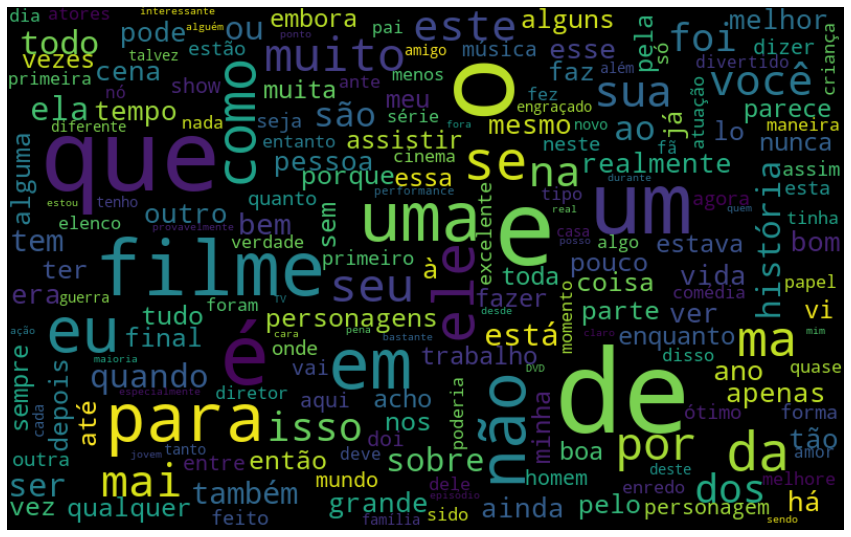

In [29]:
nuvem_palavras_pos(resenha, 'text_pt')

# NLTK - Natural Language Toolkit

In [30]:
import nltk
# nltk.download('all')
# ! pip install nltk


In [31]:
# visualização das palavras mais frequentes
#  tokenizacao: separar as palavras por space
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()
token_texto = token_space.tokenize(all_words)
frequencia = nltk.FreqDist(token_texto)

In [37]:
#  grafico de pareto para visualizar as palavras mais frequentes
import matplotlib.pyplot as plt
import seaborn as sns

def pareto_visual(texto, coluna_texto, quantidade_palavras):
    all_words = " ".join([texto for texto in texto[coluna_texto]])
    token_space = tokenize.WhitespaceTokenizer()
    token_texto = token_space.tokenize(all_words)
    frequencia = nltk.FreqDist(token_texto)
    df_frequencia = pd.DataFrame({'palavra': list(frequencia.keys()),
                            'frequencia': list(frequencia.values())})
    

    plt.figure(figsize=(12,10))
    ax = sns.barplot(data = df_frequencia.nlargest(columns = 'frequencia', n = quantidade_palavras), 
    x = 'palavra', y = 'frequencia',
                    palette = 'Blues_d')

    ax.set(ylabel = 'Contagem', xlabel = 'Palavras')
    plt.show()
    

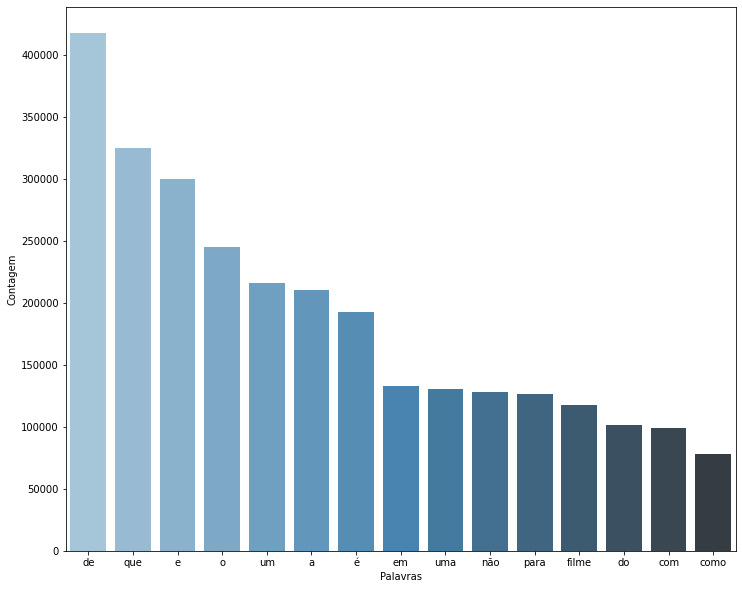

In [38]:
pareto_visual(resenha, 'text_pt', 15)

In [40]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
len(palavras_irrelevantes)

204

In [43]:
# remover palavras irrelevantes de linha do df[text_pt]

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')


frase_processada = list()

for linha in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_space.tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))
    
resenha["tratamento_1"] = frase_processada



In [44]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classification                                       tratamento_1  
0               0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1               0  Este exemplo motivo maioria filmes ação mesmos...  
2               0  Primeiro tudo odeio raps imbecis, poderiam agi...  
3               0  Nem Beatles puderam escrever músicas todos gos...  
4               0  Filmes fotos latão palavra apropriada eles, ve...

In [45]:
classificar_texto(resenha, 'tratamento_1', "classification")

0.6607359482410028

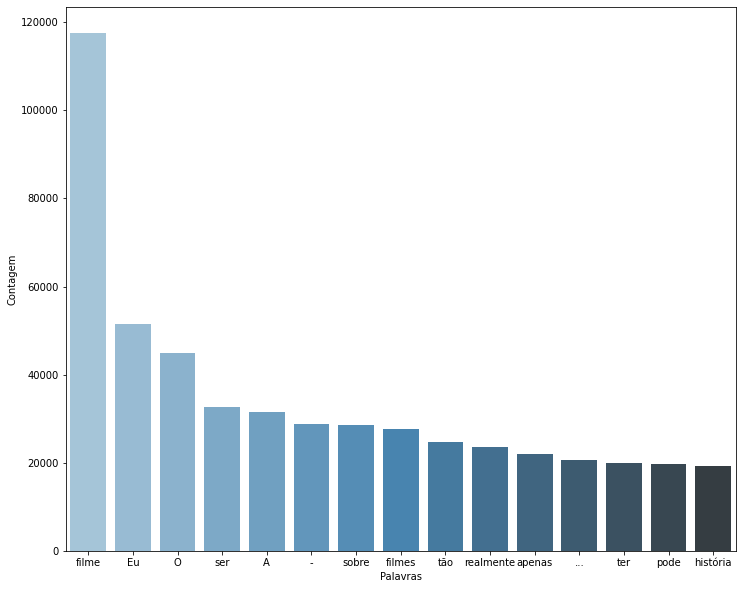

In [46]:
pareto_visual(resenha, 'tratamento_1', 15)

In [48]:
# ao usar o método WordPunctTokenizer nós evitamos que palavras seguidas de pontuação sejam consideradas diferentes.

from nltk import tokenize

frase = 'ola, mundo'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['ola', ',', 'mundo']


In [51]:
from string import punctuation

pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)

# len(pontuacao) >>> 32

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()

for linha in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [52]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classification                                       tratamento_1  \
0               0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1               0  Este exemplo motivo maioria filmes ação mesmos...   
2               0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3               0  Nem Beatles puderam escrever músicas todos gos...   
4               0  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [53]:
resenha['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [54]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

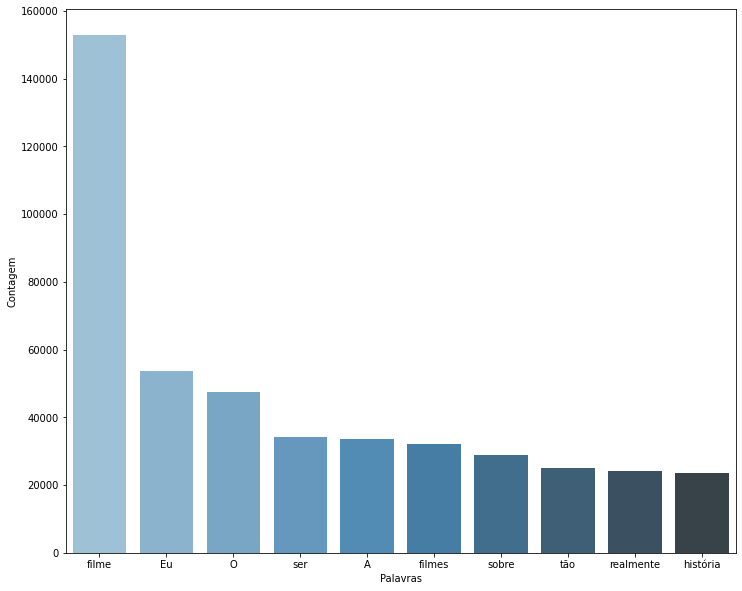

In [57]:
pareto_visual(resenha, 'tratamento_2', 10)

In [60]:
# retirar acentos
import unidecode
# ! pip install unidecode


sem_acento = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]


In [61]:
sem_acento[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [62]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [64]:
#  aplicando na base de dados

resenha['tratamento_3'] = sem_acento

frase_processada = list()

for linha in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [65]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classification                                       tratamento_1  \
0               0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1               0  Este exemplo motivo maioria filmes ação mesmos...   
2               0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3               0  Nem Beatles puderam escrever músicas todos gos...   
4               0  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [67]:
acuracia_tratamento_3 = classificar_texto(resenha, 'tratamento_3', "classification")
acuracia_tratamento_3

0.6810351799433886

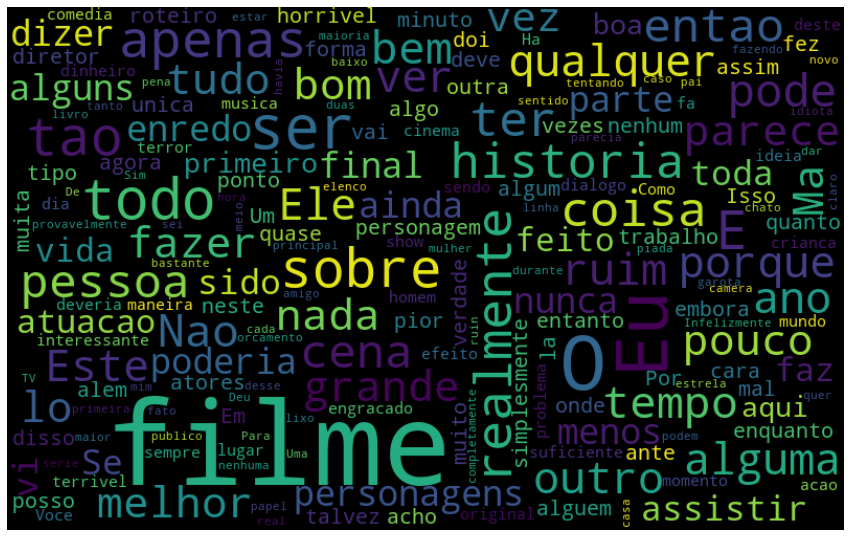

In [68]:
nuvem_palavras_neg(resenha, 'tratamento_3')

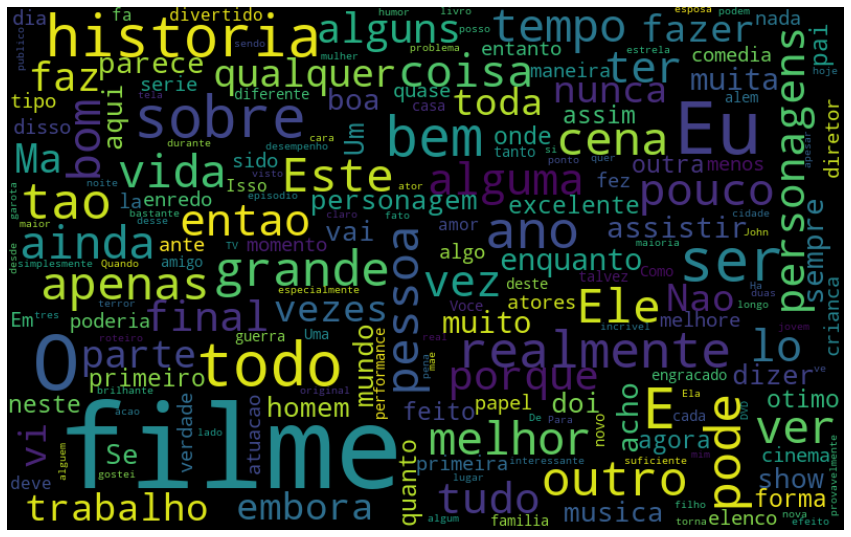

In [69]:
nuvem_palavras_pos(resenha, 'tratamento_3')

In [70]:
# transformando texto em minusculo

frase_processada = list()

for linha in resenha['tratamento_3']:
    nova_frase = list()
    linha = linha.lower()
    palavras_texto = token_pontuacao.tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [71]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [72]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

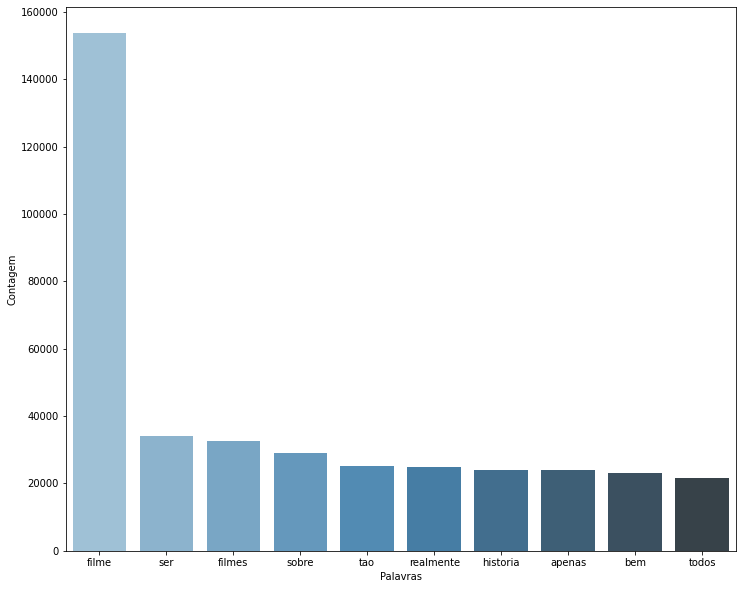

In [73]:
pareto_visual(resenha, 'tratamento_4', 10)

In [75]:
acuracia_tratamento_4 = classificar_texto(resenha, 'tratamento_4', "classification")
acuracia_tratamento_4

0.6879094217549535

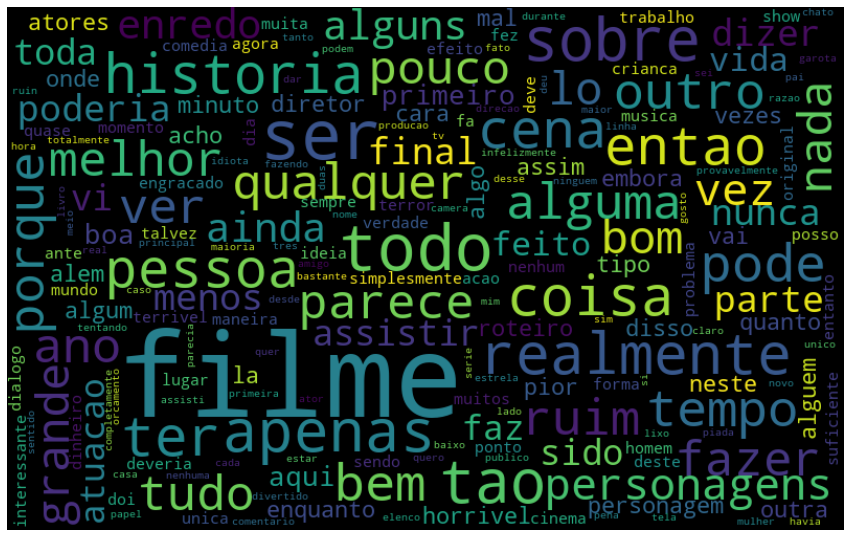

In [77]:
nuvem_palavras_neg(resenha, 'tratamento_4')

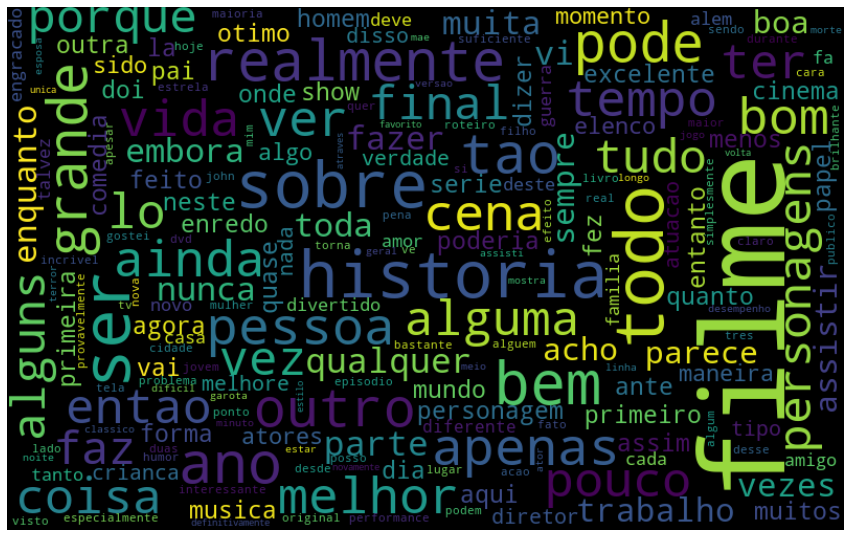

In [78]:
nuvem_palavras_pos(resenha, 'tratamento_4')

In [84]:
# stemização: reduzir palavras para sua raiz ex: filme e filmes. 
# #Portanto, vamos melhorar ainda mais os nossos dados tratando esses casos, e faremos isso por meio da biblioteca nltk. Dessa biblioteca, importaremos um algoritmo chamado RSLP, que remove os sufixos das palavras, transformando-as em um único radical comum.

#Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações. Existem diversos algoritmos para realizar a “stemmização”, seja em Português, sejam em outros idiomas.

# aplicando aos dados a tecnica de stemização

stemmer = nltk.stem.RSLPStemmer()

frase_processada = list()

for linha in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(linha)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(" ".join(nova_frase))

resenha['tratamento_5'] = frase_processada


In [85]:
acuracia_tratamento_5 = classificar_texto(resenha, 'tratamento_5', "classification")
print(acuracia_tratamento_5, acuracia_tratamento_4)

0.6943792964011323 0.6879094217549535


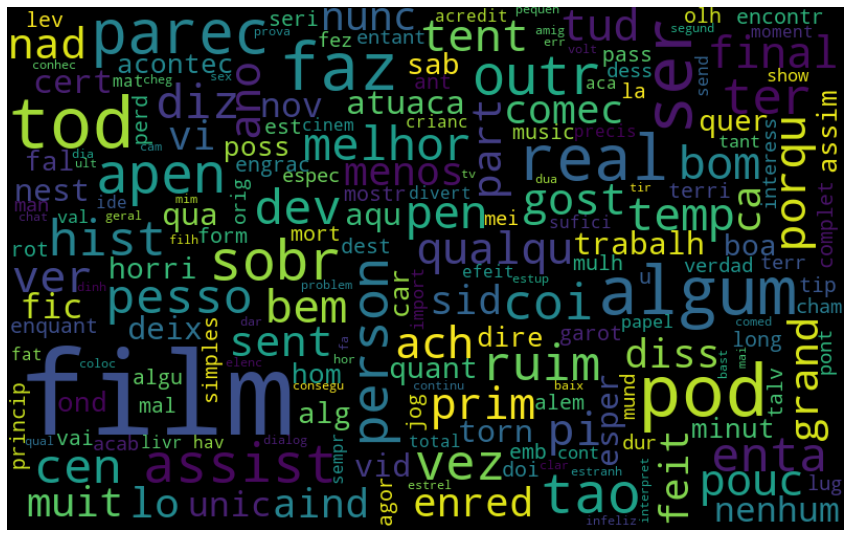

In [86]:
nuvem_palavras_neg(resenha, 'tratamento_5')


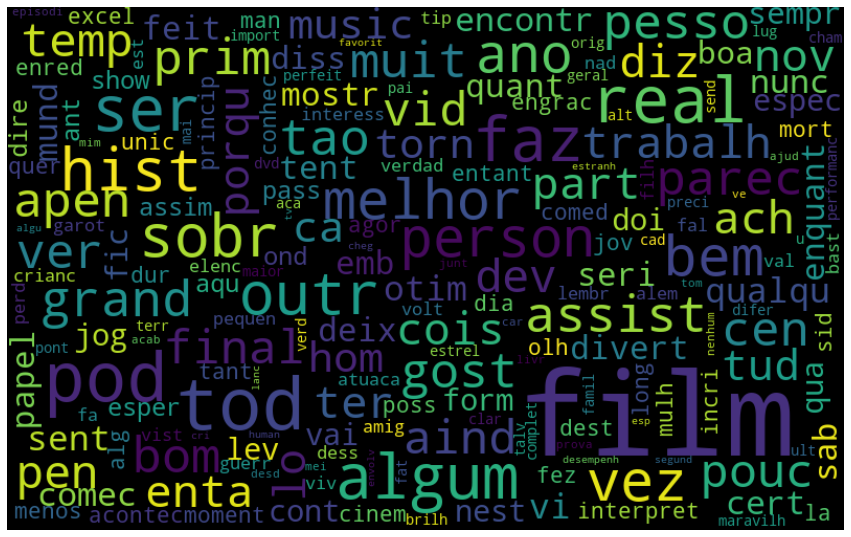

In [87]:
nuvem_palavras_pos(resenha, 'tratamento_5')

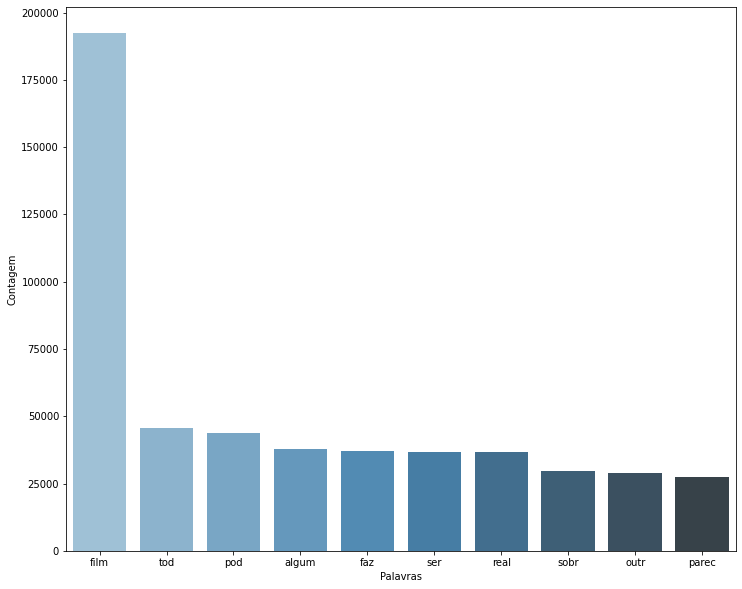

In [88]:
pareto_visual(resenha, 'tratamento_5', 10)